In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#import all the required library for machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('diabetes.csv')
df = pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#check the null value in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#Drop the duplicates values
data =df.drop_duplicates()

DATA VISUALIZATION 

<AxesSubplot: xlabel='Outcome', ylabel='count'>

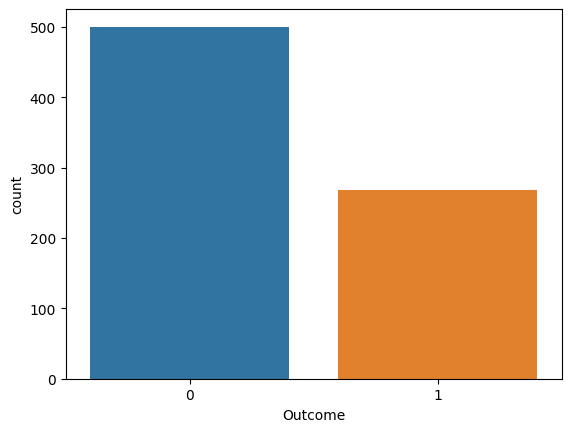

In [10]:
#check the data is balance
sns.countplot(x="Outcome",data=data)

<AxesSubplot: xlabel='Age', ylabel='Density'>

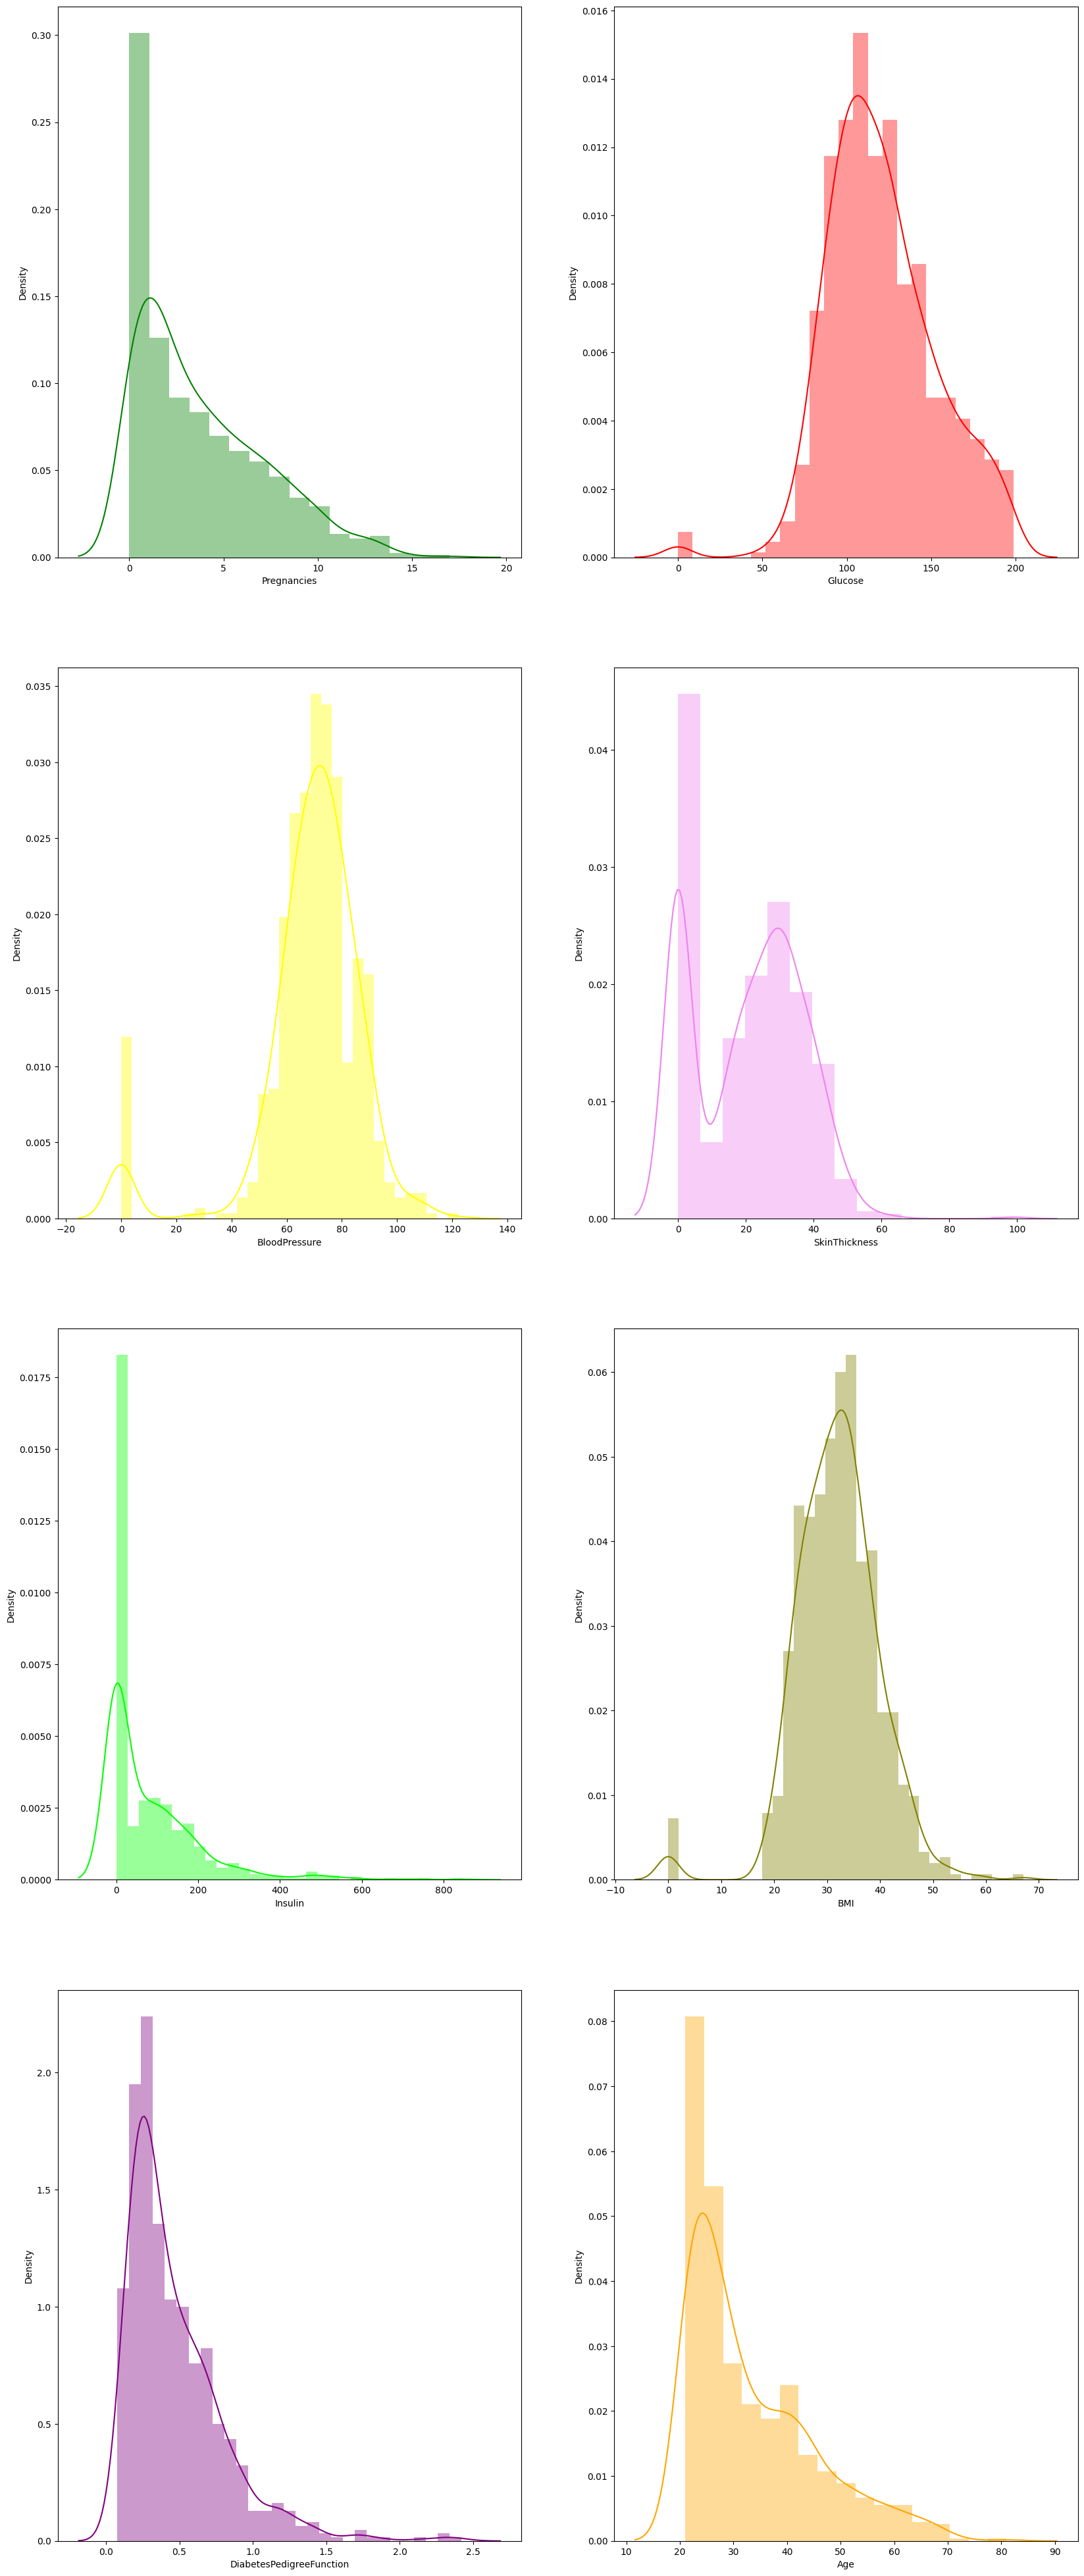

In [11]:
fig, axs = plt.subplots(4,2,figsize=(20,50))
sns.distplot(data.Pregnancies, ax=axs[0,0], color="green")
sns.distplot(data.Glucose, ax=axs[0,1], color="red")
sns.distplot(data.BloodPressure, ax=axs[1,0], color="yellow")
sns.distplot(data.SkinThickness, ax=axs[1,1], color="violet")
sns.distplot(data.Insulin, ax=axs[2,0],color="lime")
sns.distplot(data.BMI, ax=axs[2,1],color="olive")
sns.distplot(data.DiabetesPedigreeFunction, ax=axs[3,0],color="purple")
sns.distplot(data.Age, ax=axs[3,1], color="orange")


# Conclusion :- We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

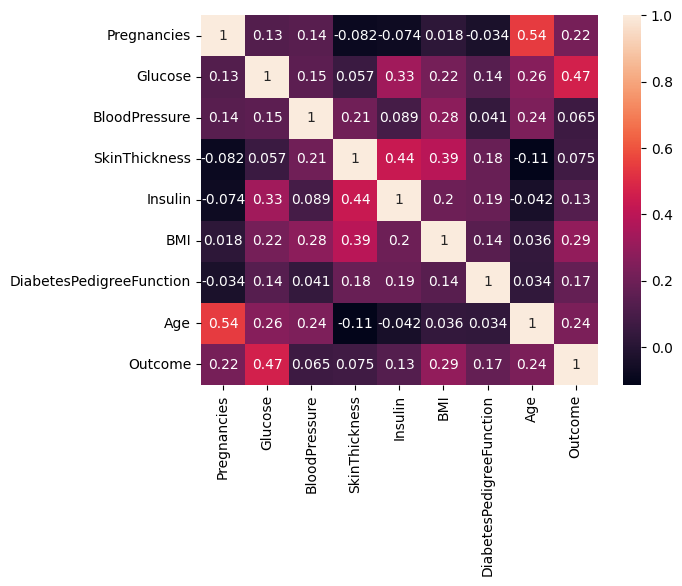

In [13]:
sns.heatmap(data.corr(),annot=True)

CONCLUSION :- Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated.

<AxesSubplot: xlabel='Age'>

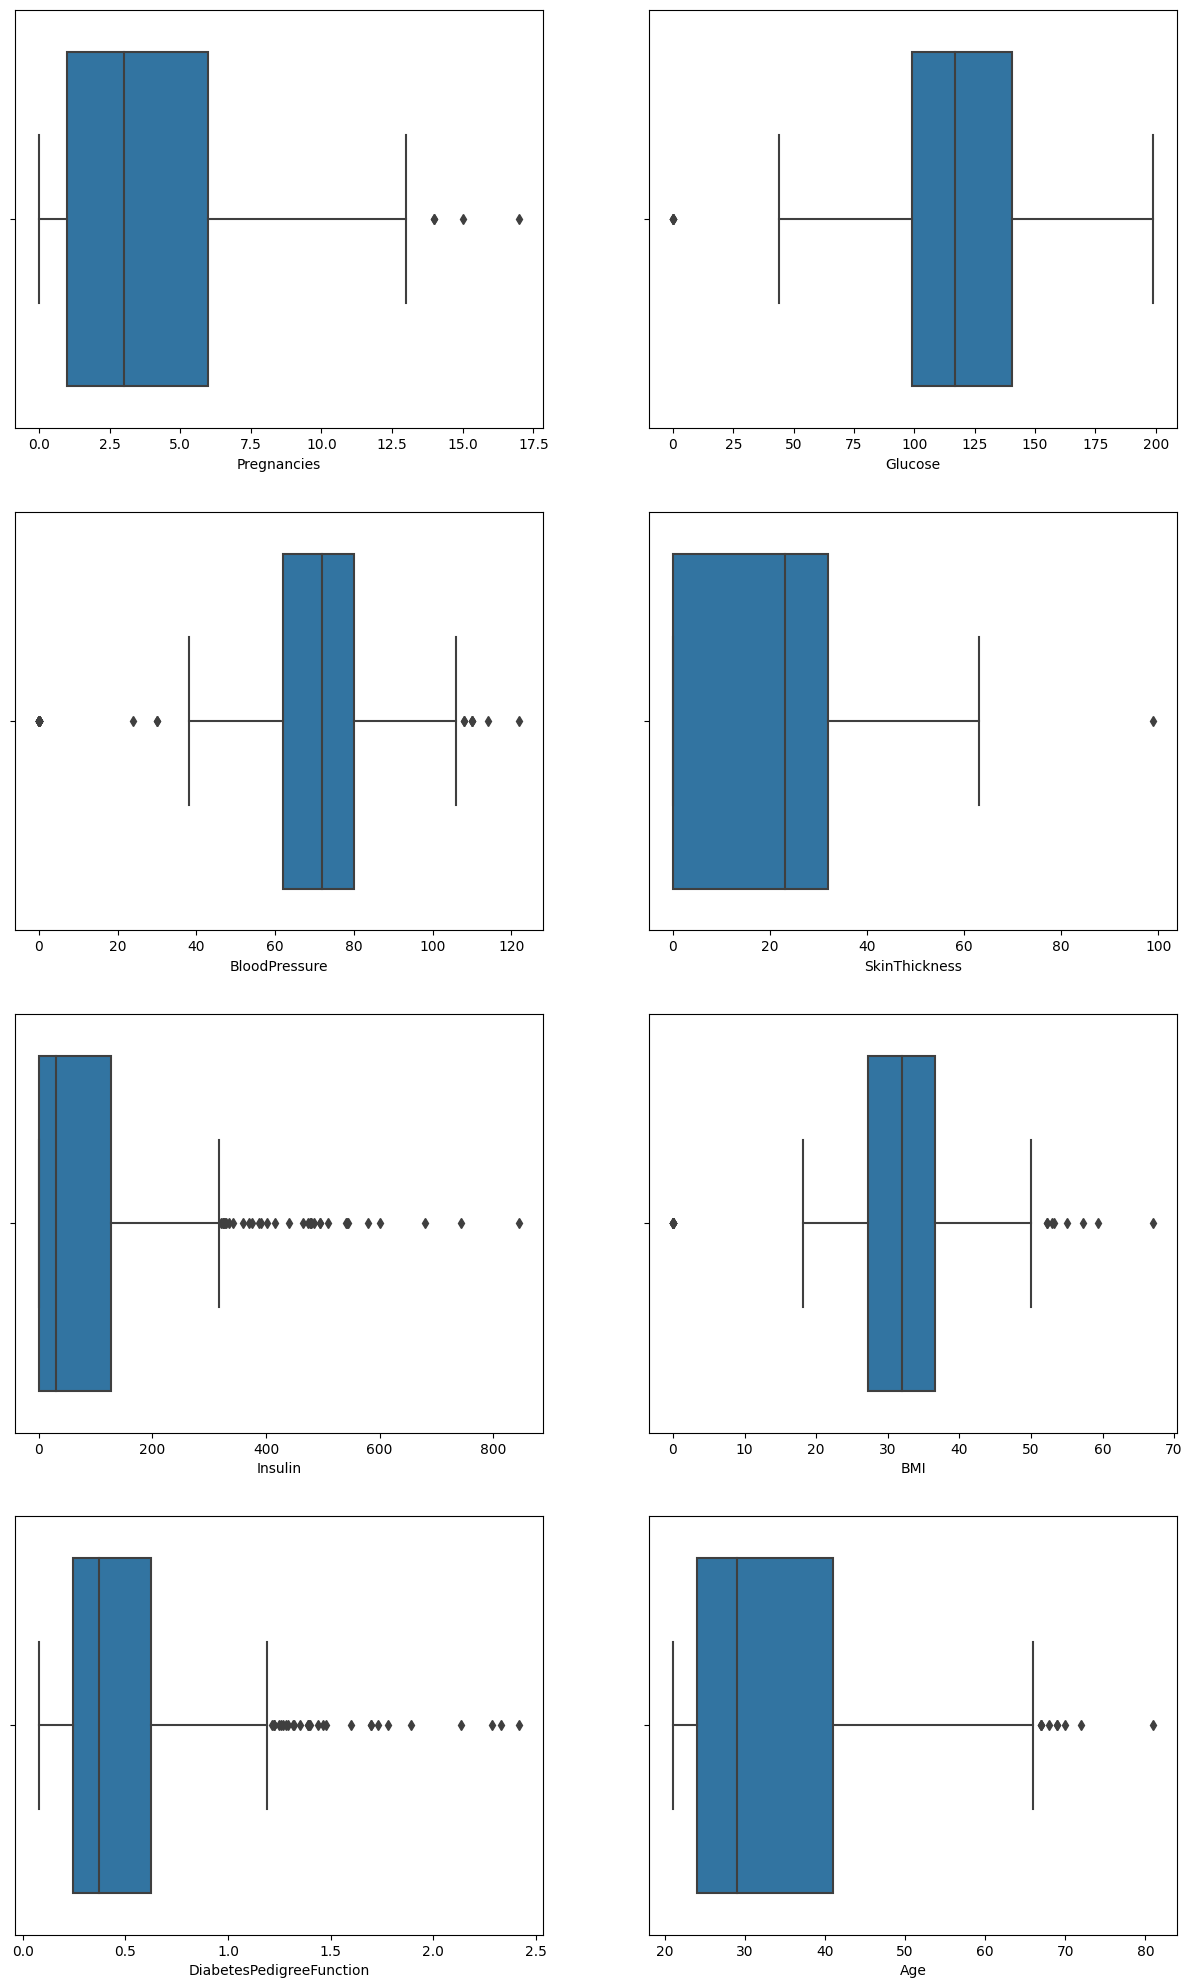

In [14]:
#Check the missing value of data

fig,ax = plt.subplots(4,2,figsize=(15,25))
sns.boxplot(x='Pregnancies',data=data,ax=ax[0,0])
sns.boxplot(x='Glucose',data=data,ax=ax[0,1])
sns.boxplot(x='BloodPressure',data=data,ax=ax[1,0])
sns.boxplot(x='SkinThickness',data=data,ax=ax[1,1])
sns.boxplot(x='Insulin',data=data,ax=ax[2,0])
sns.boxplot(x='BMI', data = data,ax=ax[2,1])
sns.boxplot(x="DiabetesPedigreeFunction", data = data, ax= ax[3,0])
sns.boxplot(x="Age", data = data, ax=ax[3,1])

In [16]:
#scale down the data
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
new_data = scl.fit_transform(data)


In [17]:
new_data = pd.DataFrame(new_data)
new_data

,0,1,2,3,4,5,6,7,8
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


In [18]:
# removing outliers

from sklearn.preprocessing import QuantileTransformer
ab = QuantileTransformer()
cd = ab.fit_transform(new_data)
df2 = pd.DataFrame(cd)
df2.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

<AxesSubplot: xlabel='Age'>

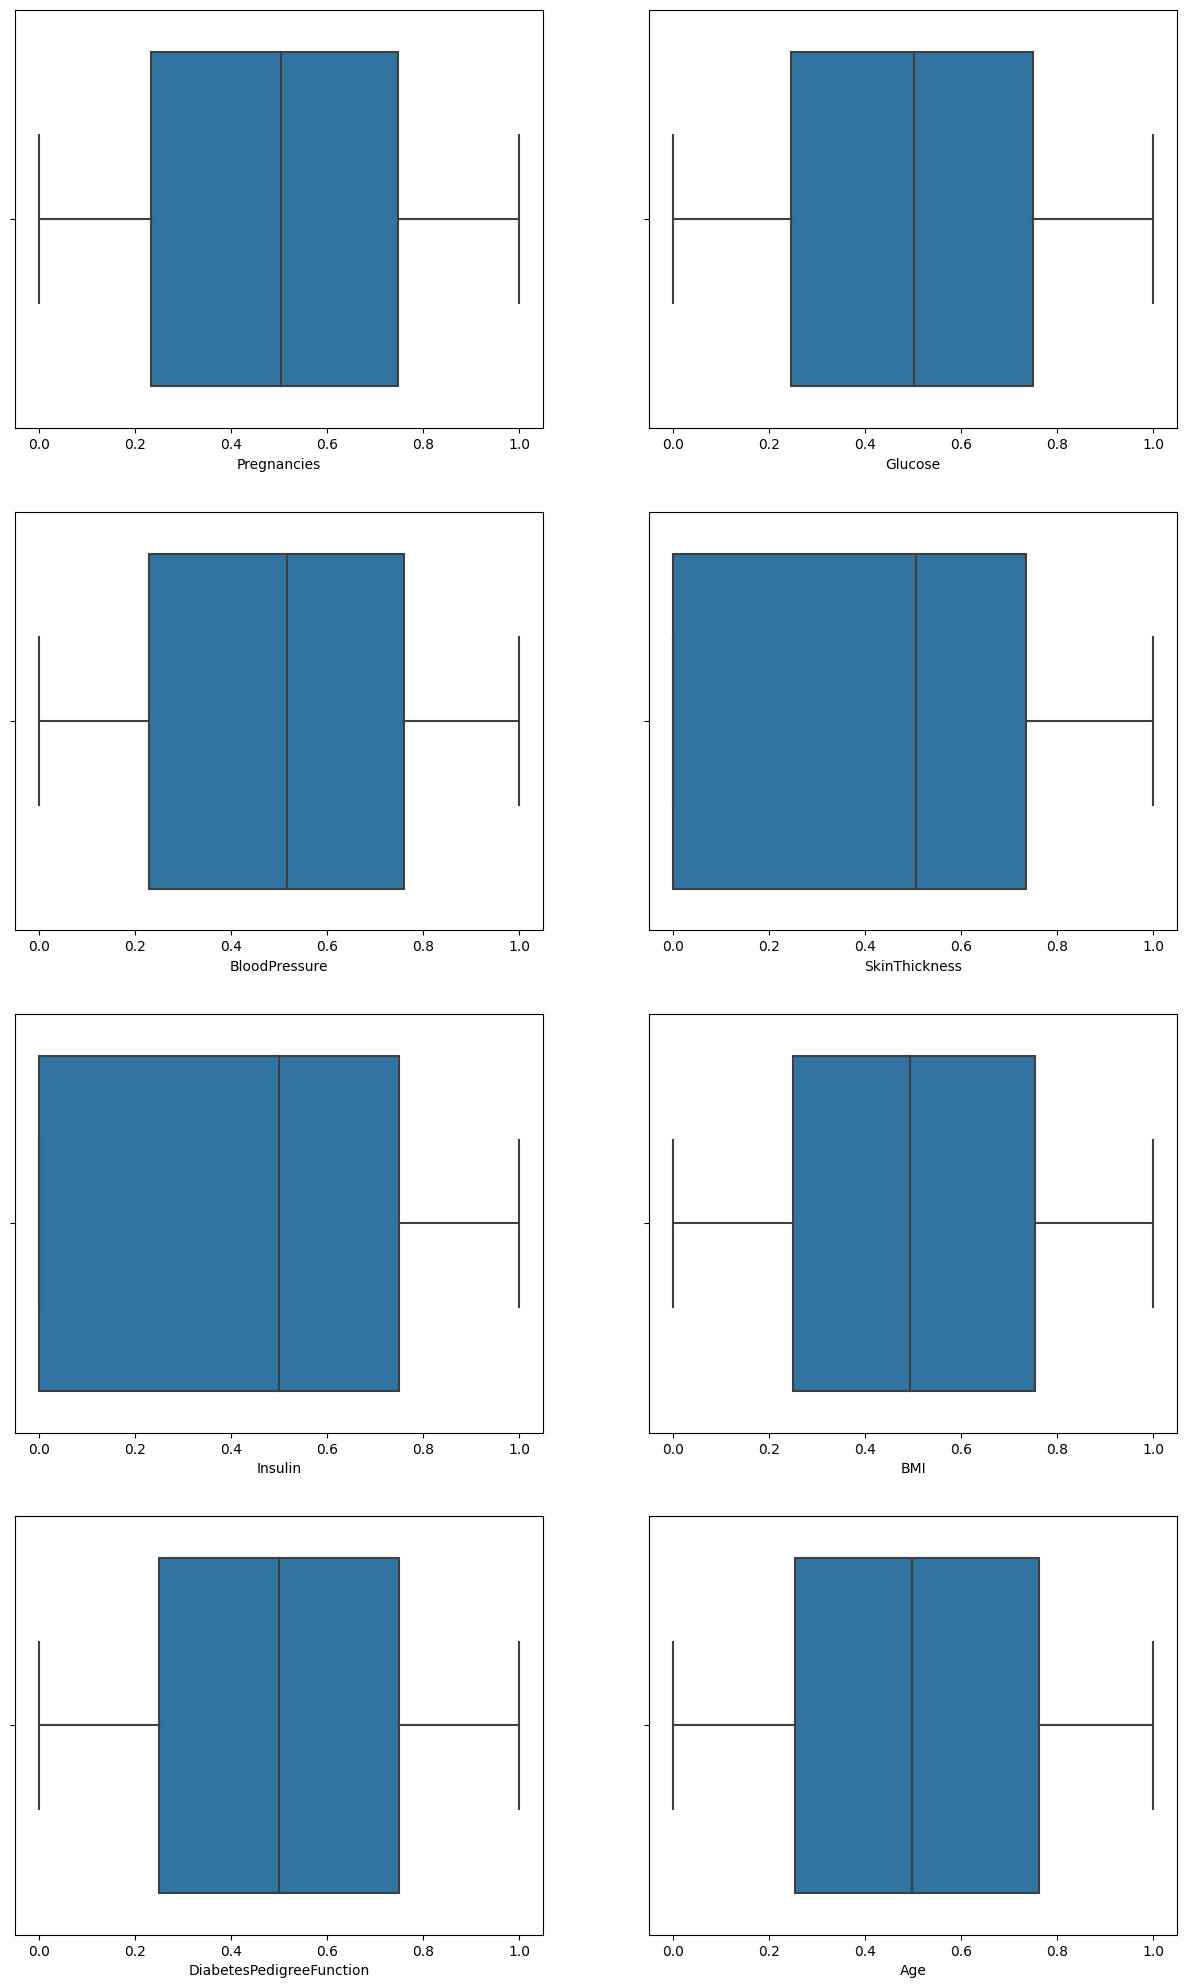

In [19]:
fig,ax = plt.subplots(4,2,figsize=(15,25))
sns.boxplot(x='Pregnancies',data=df2,ax=ax[0,0])
sns.boxplot(x='Glucose',data=df2,ax=ax[0,1])
sns.boxplot(x='BloodPressure',data=df2,ax=ax[1,0])
sns.boxplot(x='SkinThickness',data=df2,ax=ax[1,1])
sns.boxplot(x='Insulin',data=df2,ax=ax[2,0])
sns.boxplot(x='BMI', data = df2,ax=ax[2,1])
sns.boxplot(x="DiabetesPedigreeFunction", data = df2, ax= ax[3,0])
sns.boxplot(x="Age", data = df2, ax=ax[3,1])

<AxesSubplot: xlabel='Age', ylabel='Density'>

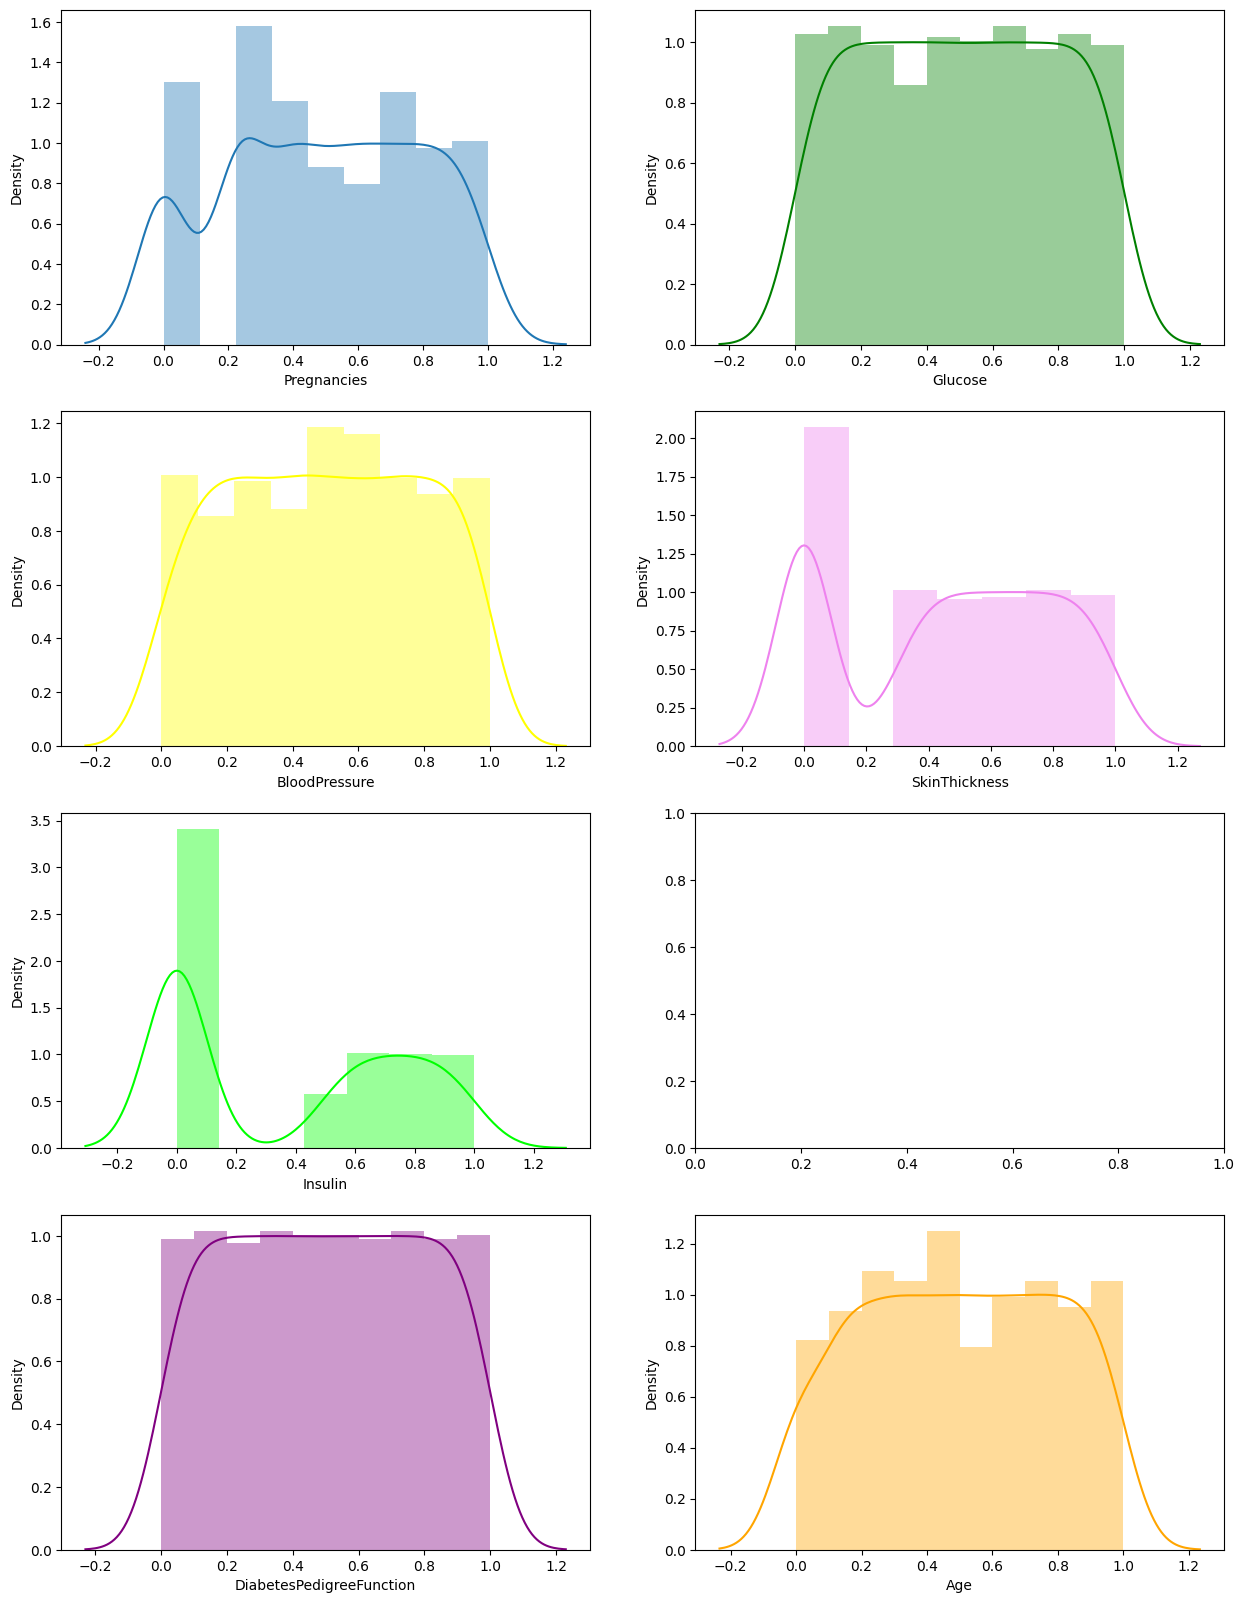

In [20]:
fig, axes = plt.subplots(4,2,figsize=(15,20))
sns.distplot(df2.Pregnancies,ax=axes[0,0])
sns.distplot(df2.Glucose,ax=axes[0,1],color='green')
sns.distplot(df2.BloodPressure, ax=axes[1,0], color="yellow")
sns.distplot(df2.SkinThickness, ax=axes[1,1], color="violet")
sns.distplot(df2.Insulin, ax=axes[2,0],color="lime")
sns.distplot(df2.BMI, ax=axs[2,1],color="olive")
sns.distplot(df2.DiabetesPedigreeFunction, ax=axes[3,0],color="purple")
sns.distplot(df2.Age, ax=axes[3,1], color="orange")

In [22]:
df2.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

# Splitting the data into Features & Targets

In [23]:
x = df2.drop(columns='Outcome',axis=1)

In [24]:
y = df2.Outcome

In [25]:
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

In [26]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.747718,0.810300,0.516949,0.801825,0.000000,0.591265,0.750978,0.889831
1,0.232725,0.097784,0.336375,0.644720,0.000000,0.227510,0.475880,0.558670
2,0.863755,0.956975,0.279009,0.000000,0.000000,0.091917,0.782269,0.585398
3,0.232725,0.131030,0.336375,0.505867,0.662973,0.298566,0.106258,0.000000
4,0.000000,0.721643,0.050847,0.801825,0.834420,0.926988,0.997392,0.606258
...,...,...,...,...,...,...,...,...
763,0.940678,0.284224,0.649935,0.978488,0.853977,0.552803,0.110821,0.976532
764,0.387223,0.561930,0.451108,0.591917,0.000000,0.760756,0.456323,0.411995
765,0.677966,0.549544,0.516949,0.505867,0.711864,0.213168,0.254889,0.529335
766,0.232725,0.619948,0.181226,0.000000,0.000000,0.400261,0.473924,0.867014


## split data into training data and testing data 

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
344,0.863755,0.199478,0.516949,0.000000,0.000000,0.760756,0.623207,0.942634
220,0.000000,0.932203,0.181226,0.644720,0.981747,0.658409,0.941330,0.000000
190,0.503259,0.425684,0.228814,0.000000,0.000000,0.073664,0.056063,0.000000
36,0.962842,0.730117,0.649935,0.000000,0.000000,0.567145,0.558018,0.642112
283,0.809648,0.870926,0.876141,0.000000,0.000000,0.413299,0.100391,0.867014
...,...,...,...,...,...,...,...,...
159,1.000000,0.883312,0.516949,0.913950,0.713820,0.891134,0.873533,0.867014
340,0.232725,0.668840,0.451108,0.331812,0.691656,0.196871,0.616688,0.128422
464,0.940678,0.478488,0.977836,0.000000,0.000000,0.112777,0.937419,0.626467
155,0.809648,0.828553,0.906128,0.949153,0.000000,0.989570,0.451108,0.659713


In [33]:
Y_train

344    0.0
220    1.0
190    0.0
36     0.0
283    1.0
      ... 
159    1.0
340    0.0
464    0.0
155    1.0
72     1.0
Name: Outcome, Length: 614, dtype: float64

In [34]:
df2.shape

(768, 9)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf = RandomForestClassifier() 
clf.fit(x_train,Y_train)

RandomForestClassifier()

In [40]:
y_pred = clf.predict(x_test)

In [41]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1.])

In [42]:
# find accuracy of dataset

In [50]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test,y_pred)
ac

0.8311688311688312